In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Data

Data used here are in the current repository.

Full and additional datasets you can find here:

[Olympic Games, 1986-2021](https://www.kaggle.com/piterfm/olympic-games-medals-19862018)

[Tokyo 2020 Olympics](https://www.kaggle.com/piterfm/tokyo-2020-olympics)

[Tokyo 2020 Paralympics](https://www.kaggle.com/piterfm/tokyo-2020-paralympics). [Data Visualization](https://share.streamlit.io/petroivaniuk/paralympics-2020/main/paralympics-app.py)

In [2]:
path_data = 'data/medals.pkl'
df = pd.read_pickle(path_data)
df.shape

(19874, 11)

In [3]:
df.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,game_location,game_name,game_season,game_year
0,Canoe Sprint,Men's Kayak Four 500m,Men,GOLD,GameTeam,NaN,Germany,Japan,Tokyo 2020,Summer,2020
1,Canoe Sprint,Men's Kayak Four 500m,Men,SILVER,GameTeam,NaN,Spain,Japan,Tokyo 2020,Summer,2020
2,Canoe Sprint,Men's Kayak Four 500m,Men,BRONZE,GameTeam,NaN,Slovakia,Japan,Tokyo 2020,Summer,2020
3,Canoe Sprint,Women's Kayak Four 500m,Women,GOLD,GameTeam,NaN,Hungary,Japan,Tokyo 2020,Summer,2020
4,Canoe Sprint,Women's Kayak Four 500m,Women,SILVER,GameTeam,NaN,Belarus,Japan,Tokyo 2020,Summer,2020


## Step 1. Filtering

In [4]:
season = 'Summer'
df[df['game_season']==season].reset_index(drop=True).head(10)

,discipline_title,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,game_location,game_name,game_season,game_year
0,Canoe Sprint,Men's Kayak Four 500m,Men,GOLD,GameTeam,NaN,Germany,Japan,Tokyo 2020,Summer,2020
1,Canoe Sprint,Men's Kayak Four 500m,Men,SILVER,GameTeam,NaN,Spain,Japan,Tokyo 2020,Summer,2020
2,Canoe Sprint,Men's Kayak Four 500m,Men,BRONZE,GameTeam,NaN,Slovakia,Japan,Tokyo 2020,Summer,2020
3,Canoe Sprint,Women's Kayak Four 500m,Women,GOLD,GameTeam,NaN,Hungary,Japan,Tokyo 2020,Summer,2020
4,Canoe Sprint,Women's Kayak Four 500m,Women,SILVER,GameTeam,NaN,Belarus,Japan,Tokyo 2020,Summer,2020
5,Canoe Sprint,Women's Kayak Four 500m,Women,BRONZE,GameTeam,NaN,Poland,Japan,Tokyo 2020,Summer,2020
6,Football,Women,Women,GOLD,GameTeam,NaN,Canada,Japan,Tokyo 2020,Summer,2020
7,Football,Women,Women,SILVER,GameTeam,NaN,Sweden,Japan,Tokyo 2020,Summer,2020
8,Football,Women,Women,BRONZE,GameTeam,NaN,USA,Japan,Tokyo 2020,Summer,2020
9,Football,Men,Men,GOLD,GameTeam,NaN,Brazil,Japan,Tokyo 2020,Summer,2020


## Step 2. Aggregation

In [5]:
discipline = 'Archery'
df_agg = df.groupby(['discipline_title', 'game_year'])['participant_type'].count().reset_index()\
           .rename(columns={'participant_type':'#medals'})
df_agg[df_agg['discipline_title']==discipline]

,discipline_title,game_year,#medals
21,Archery,1900,20
22,Archery,1904,16
23,Archery,1908,9
24,Archery,1920,21
25,Archery,1972,6
26,Archery,1976,6
27,Archery,1980,6
28,Archery,1984,6
29,Archery,1988,12
30,Archery,1992,12


## Step 3. Pivoting

In [6]:
def highlight_zero(s, props=''):
    return np.where(s==0, props, '')

df_pivot = df_agg.pivot('discipline_title', 'game_year', '#medals').fillna(0).astype(int)
df_pivot.head(10).style.apply(highlight_zero, props='color:white;background-color:pink', axis=None)

game_year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
discipline_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3x3 Basketball,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
Alpine Skiing,0,0,0,0,0,0,0,0,0,6,19,18,18,18,18,18,18,18,18,18,30,30,30,0,30,0,30,0,30,0,30,0,31,0,33,0
Archery,0,20,16,9,0,21,0,0,0,0,0,0,0,0,0,0,6,6,6,6,12,12,0,12,0,12,0,12,0,12,0,12,0,12,0,15
Artistic Gymnastics,19,3,36,6,12,11,28,24,33,28,30,47,50,43,43,42,42,44,45,45,45,47,0,45,0,42,0,42,0,42,0,42,0,42,0,43
Artistic Swimming,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,0,3,0,6,0,6,0,6,0,6,0,6,0,6
Athletics,37,68,71,79,94,87,81,81,87,87,99,99,100,102,108,108,114,111,114,125,127,131,0,132,0,139,0,135,0,140,0,138,0,141,0,141
Badminton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,15,0,15,0,15,0,15,0,15,0,15,0,15
Baseball,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,3,0,3,0,3,0,0,0,0,0,3
Basketball,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,6,6,6,6,6,0,6,0,6,0,6,0,6,0,6,0,6,0,6


## Step 2 + Step 3

In [7]:
df.pivot_table(values=['participant_type'], 
               index=['discipline_title'], 
               columns=['game_year'], 
               fill_value=0, 
               aggfunc=np.size)

participant_type                                          \
game_year                       1896 1900 1904 1908 1912 1920 1924 1928 1932   
discipline_title                                                               
3x3 Basketball                     0    0    0    0    0    0    0    0    0   
Alpine Skiing                      0    0    0    0    0    0    0    0    0   
Archery                            0   20   16    9    0   21    0    0    0   
Artistic Gymnastics               19    3   36    6   12   11   28   24   33   
Artistic Swimming                  0    0    0    0    0    0    0    0    0   
...                              ...  ...  ...  ...  ...  ...  ...  ...  ...   
Volleyball                         0    0    0    0    0    0    0    0    0   
Water Motorsports                  0    0    0    3    0    0    0    0    0   
Water Polo                         0    4    3    3    3    3    3    3    3   
Weightlifting                      6    0    6    0    0   15   15   15   15   
Wrestling                          3    0   21   27   15   31   39   39   42   

                          ...                                               \
game_year           1936  ... 2002 2004 2006 2008 2010 2012 2014 2016 2018   
discipline_title          ...                                                
3x3 Basketball         0  ...    0    0    0    0    0    0    0    0    0   
Alpine Skiing          6  ...   30    0   30    0   30    0   31    0   33   
Archery                0  ...    0   12    0   12    0   12    0   12    0   
Artistic Gymnastics   28  ...    0   42    0   42    0   42    0   42    0   
Artistic Swimming      0  ...    0    6    0    6    0    6    0    6    0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Volleyball             0  ...    0    6    0    6    0    6    0    6    0   
Water Motorsports      0  ...    0    0    0    0    0    0    0    0    0   
Water Polo             3  ...    0    6    0    6    0    6    0    6    0   
Weightlifting         15  ...    0   45    0   45    0   44    0   45    0   
Wrestling             42  ...    0   54    0   71    0   72    0   72    0   

                          
game_year           2020  
discipline_title          
3x3 Basketball         6  
Alpine Skiing          0  
Archery               15  
Artistic Gymnastics   43  
Artistic Swimming      6  
...                  ...  
Volleyball             6  
Water Motorsports      0  
Water Polo             6  
Weightlifting         41  
Wrestling             70  

[76 rows x 36 columns]

## Step 4. Visualization

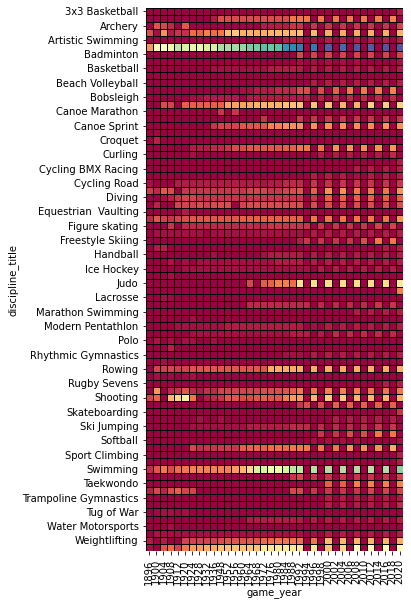

In [8]:
# simple heatmap without settings, let's go forward through the notebook
plt.figure(figsize=(10, 10))
sns.heatmap(df_pivot, annot=False, cbar=False, 
            linewidths=0.8, linecolor='black', 
            square=True, cmap='Spectral')
plt.show()

## All Steps togather

In [9]:
def get_disciplines_game(df, season):
    '''
    '''
    df = df[df['game_season']==season].reset_index(drop=True).copy()
    df_disciplines_year = df.groupby(['discipline_title', 'game_year'])['participant_type']\
                            .count().reset_index()
    df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')
    df_heatmap[df_heatmap > 0] = 1
    column_list = list(df_heatmap.columns)
    column_last = column_list[-1]

    disciplines_current = df_heatmap[df_heatmap[column_last]==1].sort_values(column_list)
    disciplines_current_not = df_heatmap[df_heatmap[column_last]!=1].sort_values(column_list)
    df_heatmap = pd.concat([disciplines_current, disciplines_current_not])  
    df_heatmap.columns = [str(col)[:-2]+'\n'+str(col)[-2:] for col in column_list]
    df_heatmap.index = [idx.replace(' ', '\n', 1) for idx in df_heatmap.index]
    return df_heatmap

In [10]:
def plot_disciplines(data, title, size=(16,16)):
    '''
    Return plot
    '''
    plt.figure(figsize=size)
    ax = sns.heatmap(data, annot=False, cbar=False, 
                     linewidths=0.8, linecolor='black', 
                     square=True, cmap='Spectral')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none') 
    ax.spines[['bottom', 'right']].set_visible(True)
    ax.set_title('{} Games'.format(title), size=22)
    plt.tight_layout()
    plt.savefig('images/heatmap_{}_games.png'.format(title.lower()), dpi=200)
    plt.show()

## Timeline of disciplines contested at the Olympic Summer Games, 1986-2020

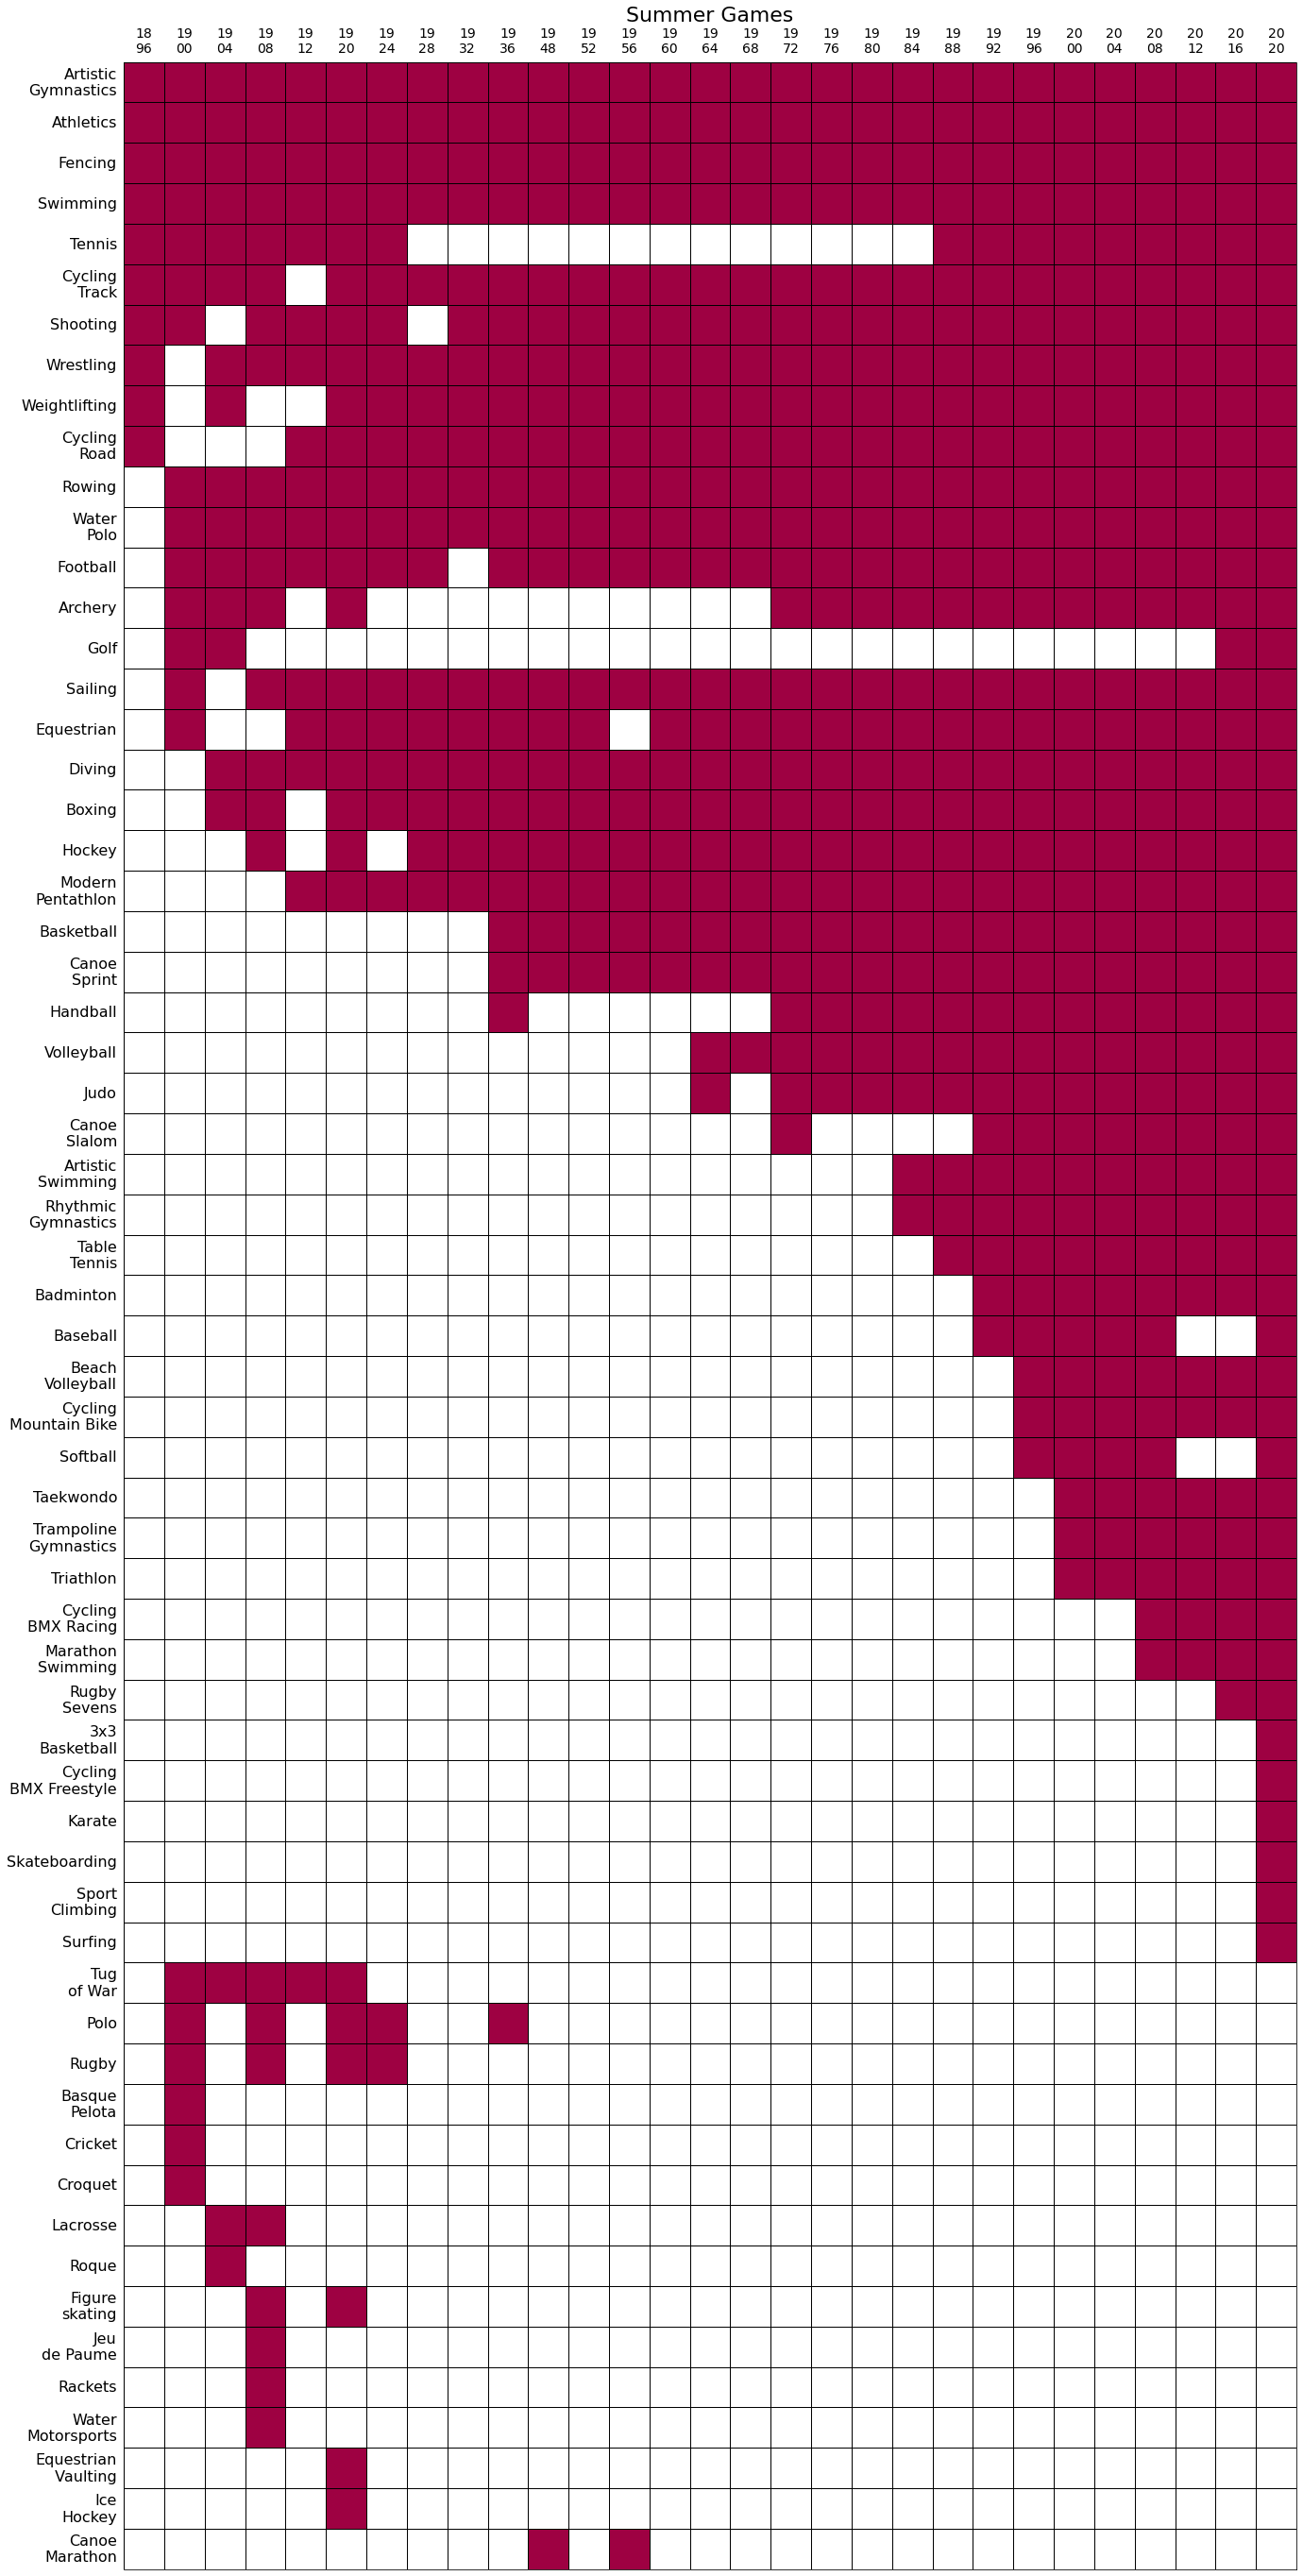

In [11]:
season = 'Summer'
size = (20, 38)
disciplines = get_disciplines_game(df, season)
plot_disciplines(disciplines, title=season, size=size)

## Timeline of disciplines contested at the Olympic Winter Games, 1986-2020

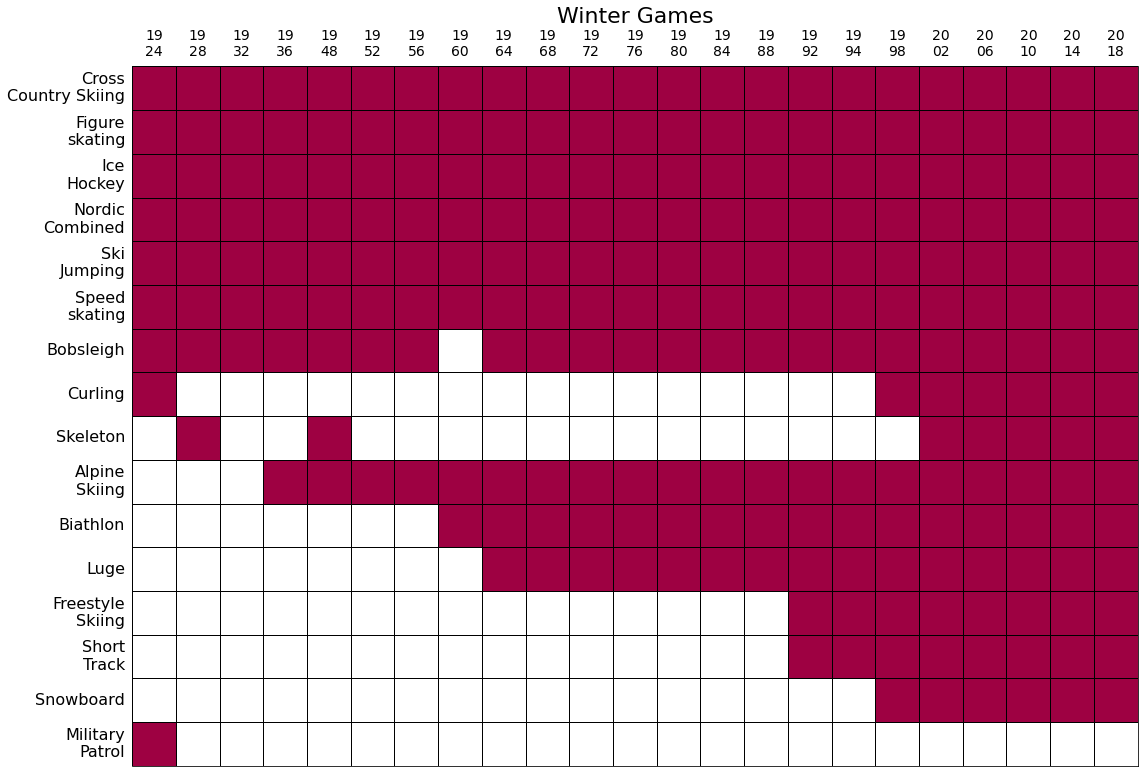

In [12]:
season = 'Winter'
size = (16,12)
disciplines = get_disciplines_game(df, season)
plot_disciplines(disciplines, title=season, size=size)

## Bonus

In [13]:
season = 'Summer'
df_summer = df[df['game_season']==season].reset_index(drop=True)
df_summer.drop(['game_season'], axis=1, inplace=True)
df_summer.shape

(16704, 10)

In [14]:
def sort_games_name(game_name_list):
    '''
    Input: ['Sydney 2000', 'Atlanta 1996', 'Beijing 2008', 'Athens 2004']
    Output: ['Atlanta 1996', 'Sydney 2000', 'Athens 2004', 'Beijing 2008'
    '''
    game_name_tuple_split = [(' '.join(i.split(' ')[:-1]), i.split(' ')[-1])  for i in game_name_list]
    game_name_tuple_sorted = sorted(game_name_tuple_split, key=lambda x: x[1])
    game_name_list_sorted = [' '.join(i) for i in game_name_tuple_sorted]
    return game_name_list_sorted

In [15]:
def get_country_medal(data, country):
    data_country = data[data['country_name']==country]
    data_medal = data_country.groupby(['game_name', 'discipline_title'])['participant_type']\
                             .count().reset_index()
    data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')
    data_medal = data_medal[sort_games_name(list(data_medal.columns))]
    if len(list(data_medal.columns))<10:
        data_medal.columns = [col.replace(' ', '\n') for col in data_medal.columns]
        data_medal.index = [idx.replace(' ', '\n', 1) for idx in data_medal.index]
    else:
        data_medal.columns = [col.split(' ')[-1] for col in data_medal.columns]
    data_medal['Total'] = data_medal.sum(axis=1)
    data_medal.loc["Total"] = data_medal.sum()
    return data_medal

In [16]:
def plot_country_medal(data, title):
    plt.figure(figsize=(20, 20))
    ax = sns.heatmap(data, annot=True, annot_kws={"fontsize":16},
                     cbar=False, linewidths=.8, fmt='g', cmap='coolwarm')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=18)
    ax.xaxis.tick_top()
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.tight_layout()
    plt.savefig('images/medals_{}.png'.format(title.lower()), dpi=200)
    plt.show()

### Medals, Ukraine

**Here could be your country!!!**

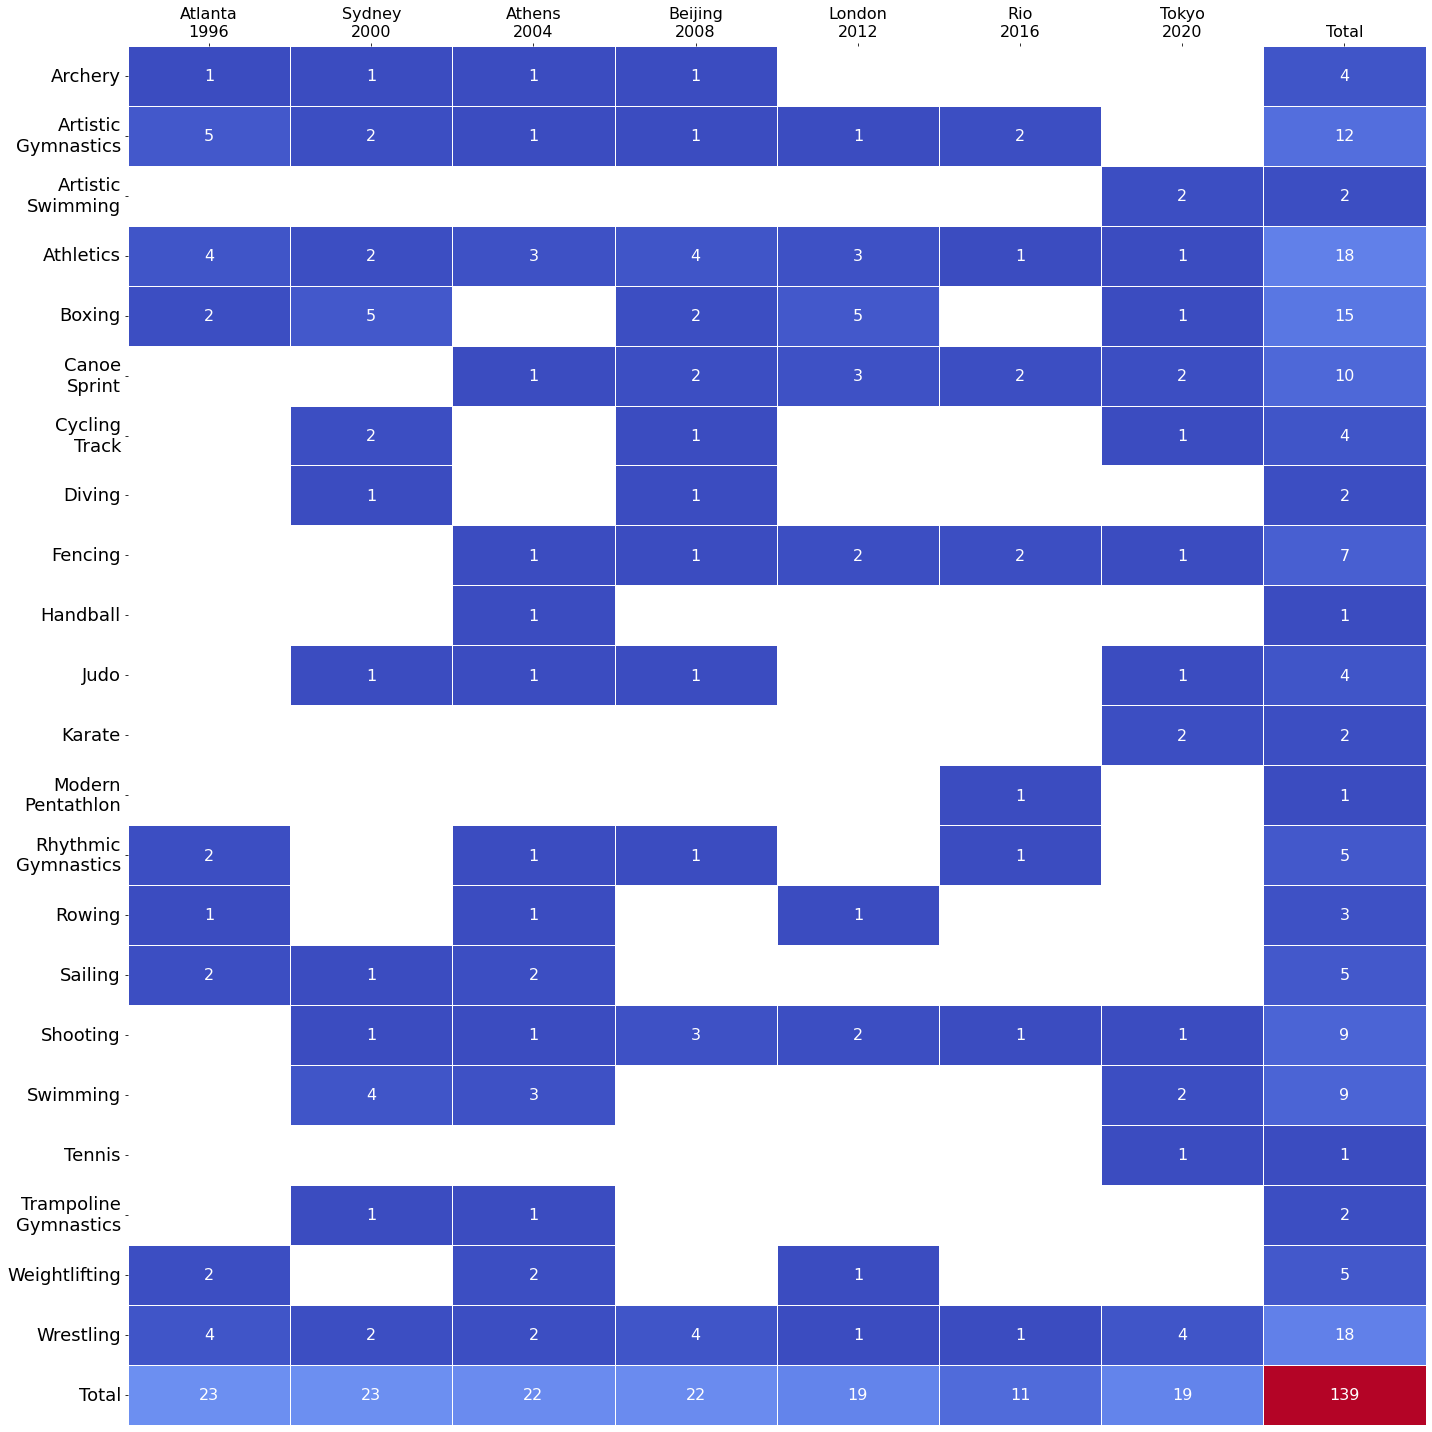

In [17]:
country = "Ukraine"
country_medal_ua = get_country_medal(df_summer, country)
plot_country_medal(country_medal_ua, title=country)

## To be continued ...